In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [5]:
# Load the processed dataset
df = pd.read_csv('processed_data.csv')

In [6]:
# Define features and target variable
X = df.drop(columns=['heart_attack'])  # Features
y = df['heart_attack']  # Target

In [7]:
# Feature Scaling (considered from processing (feature engineering))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
# Train MLP model WITHOUT GridSearchCV
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [10]:
# Evaluate the model (without tuning)
print("MLP (Without GridSearchCV) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")

MLP (Without GridSearchCV) Evaluation:
Accuracy: 0.7223
Precision: 0.6732
Recall: 0.5927
F1 Score: 0.6304


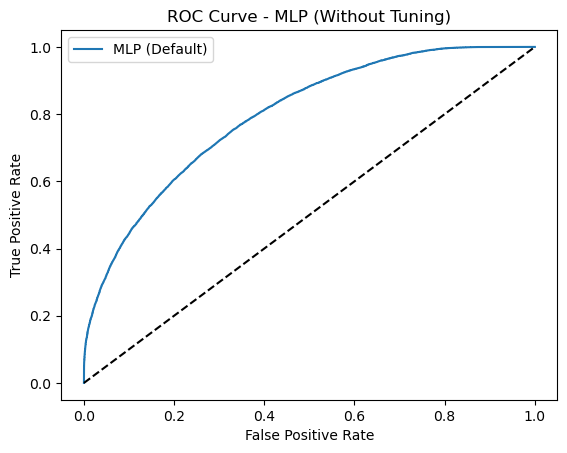

In [11]:
# Plot ROC curve for model without GridSearchCV
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='MLP (Default)')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP (Without Tuning)')
plt.legend()
plt.show()

In [12]:
# Train MLP model WITH GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500]
}

grid_search = GridSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters found
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)


Best Parameters from GridSearchCV: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'sgd'}


In [13]:
# Use the best estimator
best_mlp = grid_search.best_estimator_

In [14]:
# Evaluate the tuned model
y_pred_best_mlp = best_mlp.predict(X_test)

print("\nMLP (With GridSearchCV) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_mlp):.4f}")


MLP (With GridSearchCV) Evaluation:
Accuracy: 0.7288
Precision: 0.6797
Recall: 0.6075
F1 Score: 0.6415


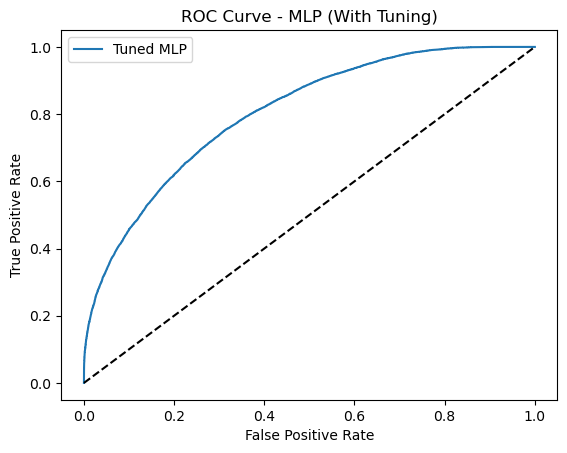

In [15]:
# Plot ROC curve for tuned model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr_best, tpr_best, label='Tuned MLP')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP (With Tuning)')
plt.legend()
plt.show()